Left image shape: (370, 427)
Right image shape: (370, 427)
Disparity map computed successfully. Shape: (370, 427)
Disparity min: -1.0, max: 113.6875


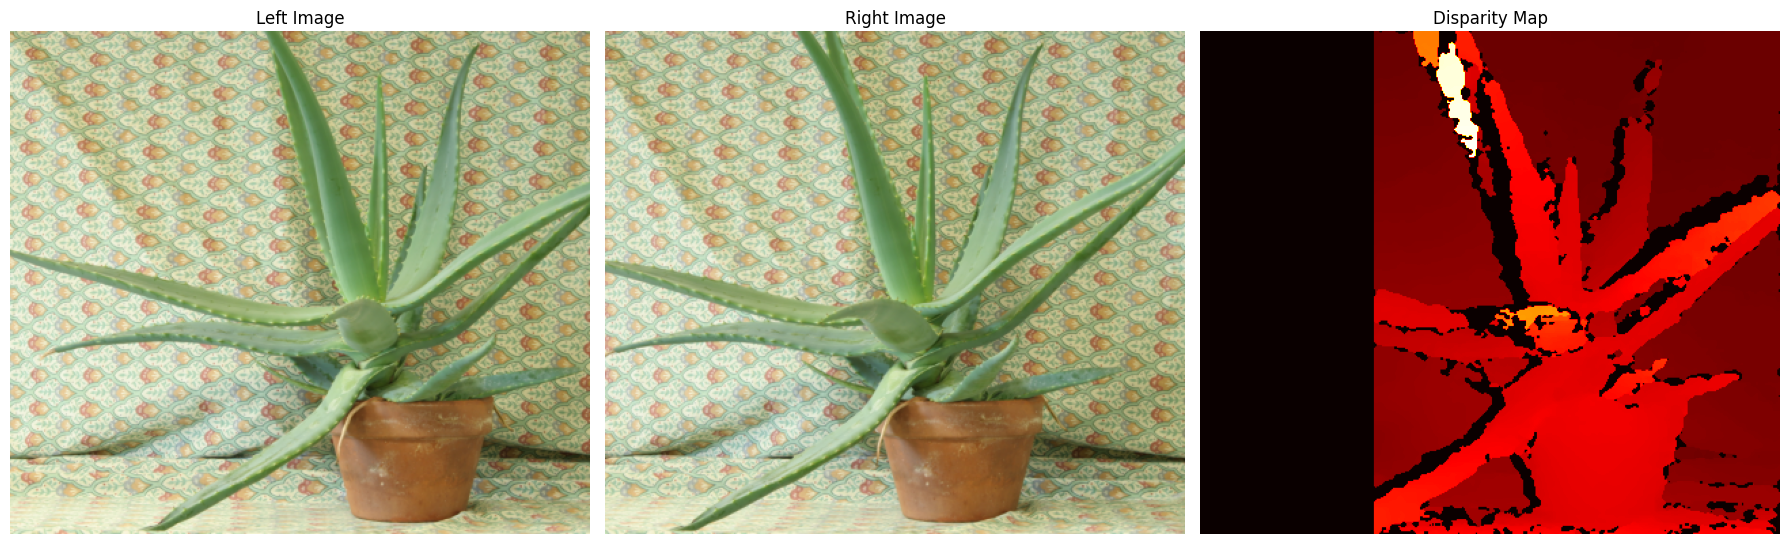

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def create_disparity_maps(left_image_path, right_image_path):
    # Check if files exist
    if not os.path.exists(left_image_path) or not os.path.exists(right_image_path):
        print(f"Error: One or both image files do not exist.")
        print(f"Left image path: {left_image_path}")
        print(f"Right image path: {right_image_path}")
        return None

    # Read the stereo pair images
    left_img = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
    right_img = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)

    if left_img is None or right_img is None:
        print('Error: Unable to load images.')
        return None

    print(f"Left image shape: {left_img.shape}")
    print(f"Right image shape: {right_img.shape}")

    # Create StereoBM object
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=128,
        blockSize=5,
        P1=8 * 3 * 5**2,
        P2=32 * 3 * 5**2,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32
    )

    # Compute disparity map
    disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0

    # Normalize the disparity map for visualization
    disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
    disparity_normalized = np.uint8(disparity_normalized)

    print(f'Disparity map computed successfully. Shape: {disparity.shape}')  
    print(f'Disparity min: {np.min(disparity)}, max: {np.max(disparity)}')  
    return disparity_normalized



def display_results(left_image_path, right_image_path, disparity_map):
    # Read original images for display
    left_img = cv2.imread(left_image_path)
    right_img = cv2.imread(right_image_path)

    # Create a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Display the left image
    ax1.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Left Image')
    ax1.axis('off')

    # Display the right image
    ax2.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
    ax2.set_title('Right Image')
    ax2.axis('off')

    # Display the disparity map
    ax3.imshow(disparity_map, cmap='hot')
    ax3.set_title('Disparity Map')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Replace these with the actual paths to your stereo image pair
    left_image_path = './view1.png'
    right_image_path = './view2.png'

    # Generate disparity map
    disparity_map = create_disparity_maps(left_image_path, right_image_path)

    if disparity_map is not None:
        # Display results
        display_results(left_image_path, right_image_path, disparity_map)
    else:
        print("Failed to generate disparity map.")